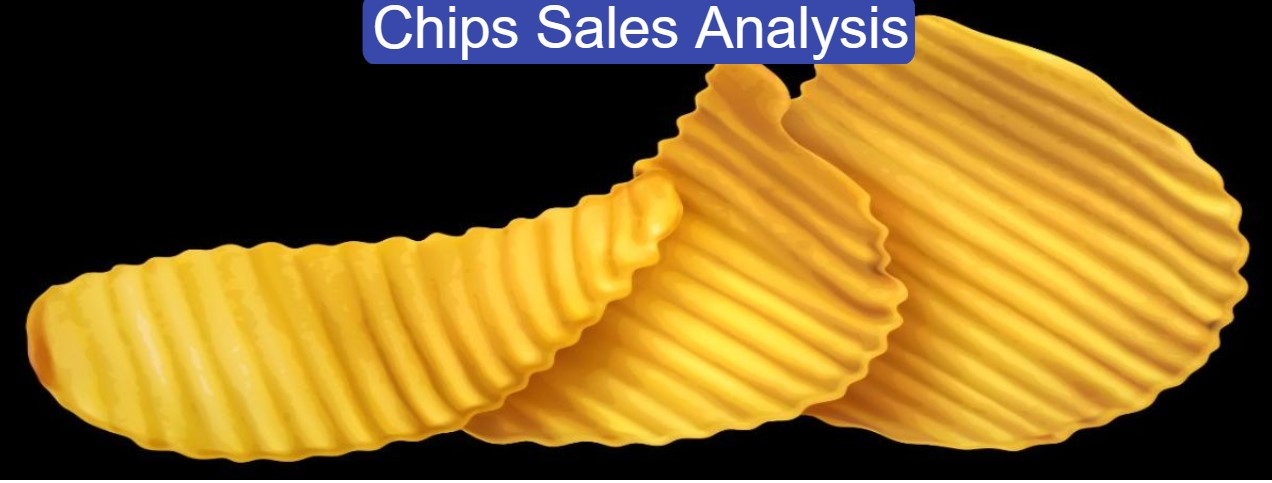

### Import Required Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import plotly.express as px
import datetime
import re

### Loading Purchase Data

In [2]:
prch=pd.read_csv('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\Chips Sales\\QVI_purchase_behaviour.csv')
prch.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


### Loading Transaction Data

In [3]:
trsc=pd.read_csv('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\Chips Sales\\QVI_transaction_data.csv')
trsc.head()

,Unnamed: 0,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


#### Drop Unmatched: 0 column

In [4]:
trsc.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
print("Rows & columns in the Data set")
print(prch.shape)
print(trsc.shape)

Rows & columns in the Data set
(72637, 3)
(264836, 8)


In [6]:
print("Column Names in Purchase Data sets")
prch.columns

Column Names in Purchase Data sets


Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [7]:
print("Column Names in Transaction Data sets")
trsc.columns

Column Names in Transaction Data sets


Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [8]:
print("Data types & Non-Null sum of columns in Purchase Data set")
prch.info()

Data types & Non-Null sum of columns in Purchase Data set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [9]:
print("Data types & Non-Null sum of columns in Transaction Data set")
trsc.info()

Data types & Non-Null sum of columns in Transaction Data set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


### Missing Values

In [10]:
prch.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [11]:
trsc.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

**Both Data set not contain any missing value.**

### Data type of Date column is integer, change it to Datetime

In [12]:
def int_to_datetime(date):
    counting_start = datetime.datetime(1900, 1, 1)
    if(date < 60):
        delta_in_days = datetime.timedelta(days = (date - 1))
    else:
        days_from_counting_start = datetime.timedelta(days = (date - 2))
    converted_to_date = counting_start + days_from_counting_start
    return converted_to_date

# Apply function to DATE column
trsc['DATE'] = trsc['DATE'].apply(int_to_datetime)
trsc.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [13]:
trsc['DATE'].nunique()

364

#### We have 364 Days Data. Lets check which Date is missing.

In [14]:
print("Startind Date :", trsc['DATE'].min())
print("Endind Date :", trsc['DATE'].max())

Startind Date : 2018-07-01 00:00:00
Endind Date : 2019-06-30 00:00:00


In [15]:
pd.date_range(start = '2018-07-01', end = '2019-06-30').difference(trsc['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

**This is Expected because on christmas festival most of the shops are closed.**

### Outliers in TOT_SALES & PROD_QTY columns

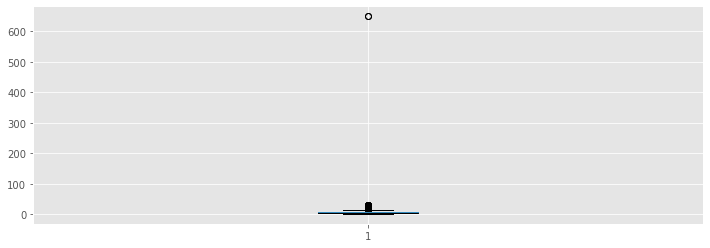

In [16]:
plt.figure(figsize=(12,4))
plt.boxplot(trsc['TOT_SALES']);

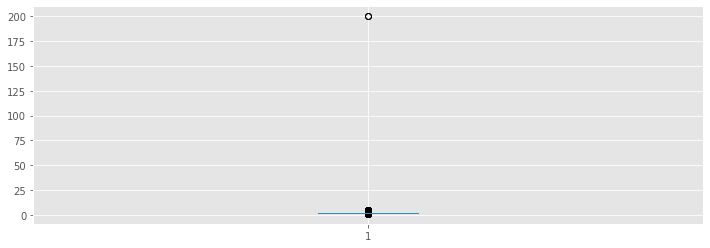

In [17]:
plt.figure(figsize=(12,4))
plt.boxplot(trsc['PROD_QTY']);

In [18]:
trsc['PROD_QTY'].sort_values(ascending=False)[:5]

69762     200
69763     200
217237      5
238333      5
238471      5
Name: PROD_QTY, dtype: int64

In [19]:
trsc.iloc[69762:69764]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


- **Above are the rows where we found Outliers in PROD_QTY & TOT_SALES column.**
- **As we can see these value will not be considered as outliers because if we buy 200 package of chips it is obvious that price will be high.**

#### Drop these rows as these may affect our analysis

In [24]:
trsc.drop([69762,69763], inplace=True)
trsc.shape

(264834, 8)

#### Now Check the Outliers

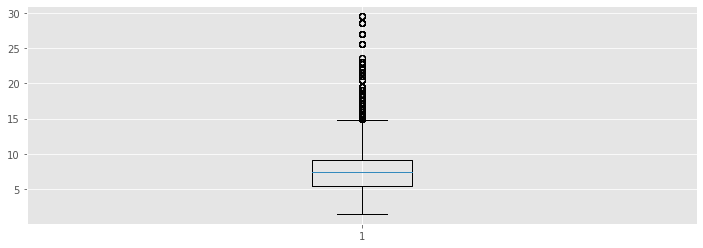

In [25]:
plt.figure(figsize=(12,4))
plt.boxplot(trsc['TOT_SALES']);

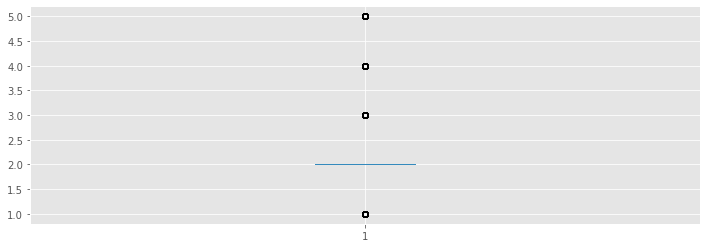

In [26]:
plt.figure(figsize=(12,4))
plt.boxplot(trsc['PROD_QTY']);

**We removed the Ouliers.**

### Duplicate Values

In [27]:
trsc.duplicated().sum()

1

#### See the duplicate rows

In [28]:
duplicate = trsc[trsc.duplicated(keep=False)]
duplicate = duplicate.groupby(list(duplicate)).apply(lambda x: tuple(x.index)).tolist()
duplicate

[(124843, 124845)]

In [29]:
trsc.loc[124843:124846:2]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124843,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


#### Drop Duplicated rows

In [30]:
trsc.drop_duplicates(keep='first', subset=None, inplace=True, ignore_index=True)
trsc.duplicated().sum()

0

### Create a New Column "Price" which indicate the Price of each package

In [31]:
trsc['PRICE']=trsc['TOT_SALES']/trsc['PROD_QTY']
trsc.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,4.60


### Create new Column "Weight in gms" which can be extracted from "Product Name" column.

In [32]:
trsc['WEIGHT_IN_GRAM'] = trsc['PROD_NAME'].str.extract("(\d+)")
trsc.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PRICE,WEIGHT_IN_GRAM
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,3.00,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2.10,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1.45,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,3.00,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,4.60,150


In [33]:
trsc.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
PRICE                    float64
WEIGHT_IN_GRAM            object
dtype: object

#### Change the data type of newly created column from object to int

In [34]:
trsc['WEIGHT_IN_GRAM'] = pd.to_numeric(trsc['WEIGHT_IN_GRAM'])
trsc.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
PRICE                    float64
WEIGHT_IN_GRAM             int64
dtype: object

### Using "re" package clean the text in Product Name column

In [35]:
def cleaning_text(text):
    text = re.sub('[&/]', ' ', text) # remove '&' and '/'
    text = re.sub('\d\w*', ' ', text) # remove digits
    return text

# Apply text cleaning function to PROD_NAME column
trsc['PROD_NAME'] = trsc['PROD_NAME'].apply(cleaning_text)
trsc.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PRICE,WEIGHT_IN_GRAM
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,3.00,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,2.10,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,1.45,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,3.00,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,4.60,150


**Now Product Name's Looking Cleaner to read**

### In the Product Name column The First word Reffered to a Company in which the chips packages manufactured, Extract the Company Name.

In [36]:
words = trsc['PROD_NAME'].str.partition()
trsc['COMPANY/BRAND'] = words[0]
trsc.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PRICE,WEIGHT_IN_GRAM,COMPANY/BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,3.00,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,2.10,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,1.45,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,3.00,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,4.60,150,Kettle


#### How many unique companies or brands chips we have

In [37]:
trsc['COMPANY/BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

#### Same names are repeated with short-form, replcae these Names.

In [38]:
trsc['COMPANY/BRAND'].replace('NCC', 'Natural', inplace = True)
trsc['COMPANY/BRAND'].replace('CCs', 'CCS', inplace = True)
trsc['COMPANY/BRAND'].replace('Smith', 'Smiths', inplace = True)
trsc['COMPANY/BRAND'].replace(['Grain', 'GrnWves'], 'Grainwaves', inplace = True)
trsc['COMPANY/BRAND'].replace('Dorito', 'Doritos', inplace = True)
trsc['COMPANY/BRAND'].replace('WW', 'Woolworths', inplace = True)
trsc['COMPANY/BRAND'].replace('Infzns', 'Infuzions', inplace = True)
trsc['COMPANY/BRAND'].replace('Snbts', 'Sunbites', inplace = True)

trsc['COMPANY/BRAND'].unique()

array(['Natural', 'CCS', 'Smiths', 'Kettle', 'Old', 'Grainwaves',
       'Doritos', 'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red', 'Pringles', 'Tyrrells', 'Cobs', 'French',
       'RRD', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

### How many Unique Store Numbers we have?

In [41]:
trsc['STORE_NBR'].nunique()

272

**Only 272 Stores are there.**

### How many unique loyality card number present in Transaction Data?

In [42]:
trsc['LYLTY_CARD_NBR'].nunique()

72636

### How many unique loyality card number present in Purchase Data?

In [43]:
prch['LYLTY_CARD_NBR'].nunique()

72637

**Missmatch because we droped the One Outlier, So remove the row in purchase dataset with same Loyality Card Number**

In [50]:
prch.drop(prch.index[prch['LYLTY_CARD_NBR'] == 226000], inplace = True)
prch['LYLTY_CARD_NBR'].nunique()

72636

**Now Both Dataset contains Same Number of Unique Loyality Card Numbers.**

### What are the Unique Transaction Id we have?

In [51]:
trsc['TXN_ID'].nunique()

263125

In [52]:
trsc.shape

(264833, 11)

**There 272 Stores that means Transaction Id may have repeated, so Transaction Id's are not unique for all rows**

### What ae the Different LIFESTAGE data have?

In [55]:
prch['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [58]:
prch['LIFESTAGE'].value_counts().sort_values(ascending = False)

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9779
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

- **Datset contains 7 different Lifestage Constumers**
- **MAXIMUM costomers are belongs to RETIREES, OLDER SINGLES/COUPLES, YOUNG SINGLES/COUPLES Category.**

### What are the different PREMIUM CUSTOMER data have?

In [57]:
prch['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [59]:
prch['PREMIUM_CUSTOMER'].value_counts().sort_values(ascending = False)

Mainstream    29245
Budget        24470
Premium       18921
Name: PREMIUM_CUSTOMER, dtype: int64

- **There Are 3 different Types of Customers.**
- **Maximum constumers are "Mainstream".**

## Merge Both Data sets And Analyse 

In [60]:
data = pd.merge(trsc, prch)
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PRICE,WEIGHT_IN_GRAM,COMPANY/BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,3.00,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,2.10,175,CCS,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,1.90,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,2.10,175,CCS,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,1.45,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [61]:
print("Shape:", data.shape)

Shape: (264833, 13)


In [62]:
print("Missing Values:\n", data.isna().sum())

Missing Values:
 DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PRICE               0
WEIGHT_IN_GRAM      0
COMPANY/BRAND       0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


No missing Values.

### Total Sales by Date

In [71]:
sales_by_day=pd.pivot_table(data=data, index='DATE', values='TOT_SALES', aggfunc=sum)
sales_by_day

,TOT_SALES
DATE,
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9
...,...
2019-06-26,5305.0
2019-06-27,5202.8
2019-06-28,5299.6


In [81]:
sales=sales_by_day.reset_index()
figure = px.line(sales, x='DATE', y='TOT_SALES', 
                 title='Chips Sales by Stores')

figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=9, label="9m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
figure.show()

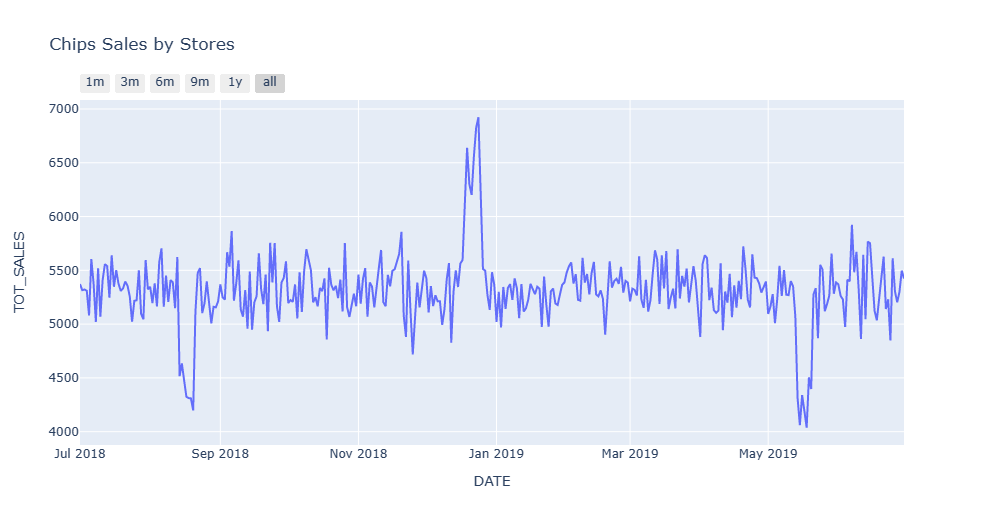

- **Sales went to minimun twise in a span of 365 days, in August 2018 and then in May 2019.**
- **Sales in High in December Month Due to Christmas & New year.**

### Top 10 Stores with Maximum Sales

In [88]:
top10_store=pd.pivot_table(data=data, index='STORE_NBR', values='TOT_SALES',
                           aggfunc=sum).sort_values(by='TOT_SALES', ascending=False)[:10]
top10_store

,TOT_SALES
STORE_NBR,
226,17605.45
88,16333.25
165,15973.75
40,15559.50
237,15539.50
58,15251.45
199,14797.00
4,14647.65
203,14551.60


In [91]:
top10=top10_store.reset_index()
top10["STORE_NBR"]=top10["STORE_NBR"].astype(str)
figure=px.bar(data_frame=top10,
                  x='STORE_NBR', y='TOT_SALES',
                  title='Top 10 Stores with Highest Sales')
figure.show()

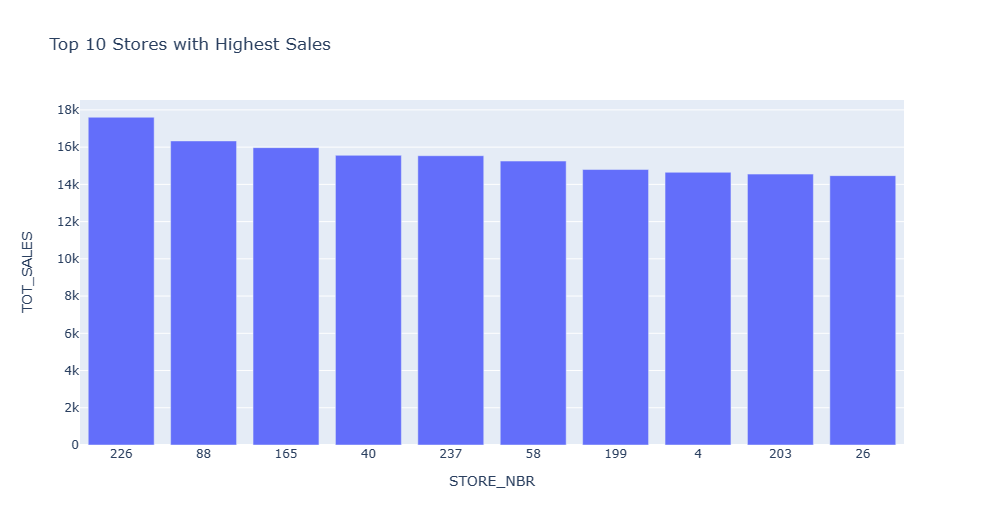

- **Store Number- 226 done Highest Sales.**

### Stores value count to check how many times a perticular store Sold Chilps

In [96]:
data.STORE_NBR.value_counts()[:15]

226    2020
88     1873
93     1832
165    1819
237    1785
43     1771
40     1764
230    1751
213    1747
156    1747
58     1743
63     1742
128    1714
100    1711
152    1707
Name: STORE_NBR, dtype: int64

- **Again Store Number 226 has sold Chips most of the Times.**

### Top 10 Customer by Loyality Card Number

In [97]:
top10_cust=pd.pivot_table(data=data, index='LYLTY_CARD_NBR', values='TOT_SALES',
                           aggfunc=sum).sort_values(by='TOT_SALES', ascending=False)[:10]
top10_cust

,TOT_SALES
LYLTY_CARD_NBR,
230078,138.60
63197,132.80
259009,127.20
162039,126.80
58361,124.80
230154,124.40
94185,122.80
130090,122.65
179228,120.80


In [99]:
top10=top10_cust.reset_index()
top10["LYLTY_CARD_NBR"]=top10["LYLTY_CARD_NBR"].astype(str)
figure=px.bar(data_frame=top10,
                  x='LYLTY_CARD_NBR', y='TOT_SALES',
                  title='Top 10 Customers')
figure.show()

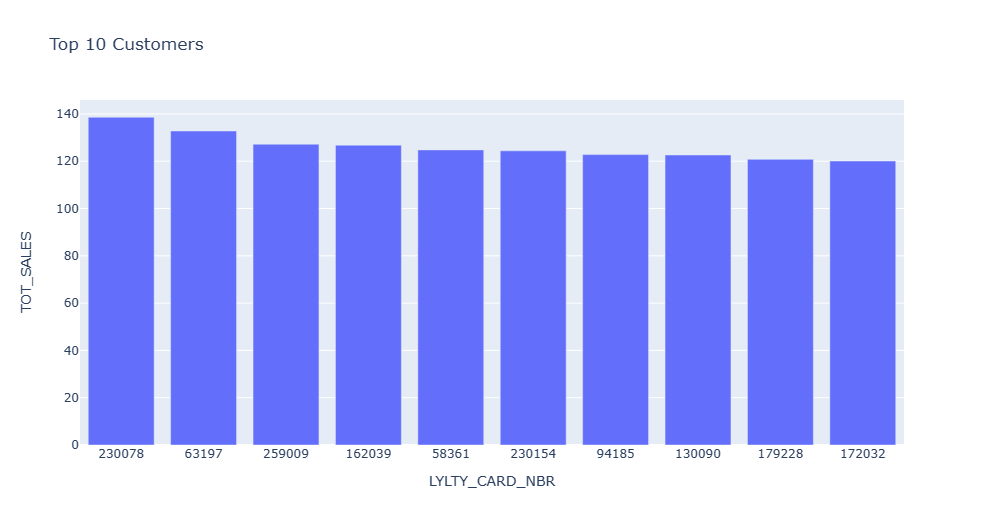

- **Customer with Loyality Card Number- 230078 purchased Chips of worth 138 over a period of 1 year.**

### Top 10 Product with Highest Sales

In [100]:
top10_prod=pd.pivot_table(data=data, index='PROD_NAME', values='TOT_SALES',
                           aggfunc=sum).sort_values(by='TOT_SALES', ascending=False)[:10]
top10_prod

,TOT_SALES
PROD_NAME,
Dorito Corn Chp Supreme,39052.0
Smiths Crnkle Chip Orgnl Big Bag,36367.6
Smiths Crinkle Chips Salt Vinegar,34804.2
Kettle Mozzarella Basil Pesto,34457.4
Smiths Crinkle Original,34302.6
Cheezels Cheese,34296.9
Doritos Cheese Supreme,33390.6
Kettle Sweet Chilli And Sour Cream,33031.8
Kettle Original,32740.2


In [101]:
top10=top10_prod.reset_index()
figure=px.bar(data_frame=top10,
                  x='PROD_NAME', y='TOT_SALES',
                  title='Top 10 Products')
figure.show()

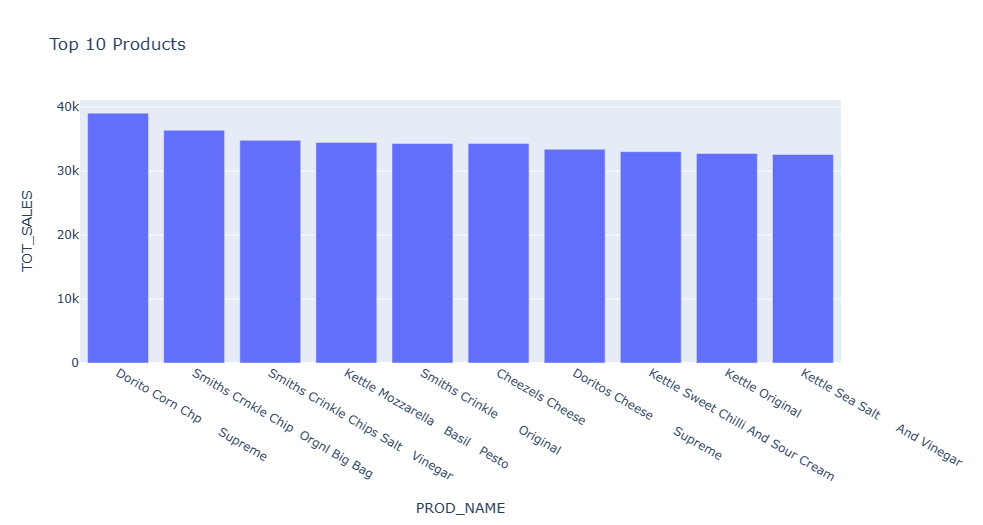

- **Dorito Corn Chp Supreme is the Product with maximum business of 39k**.

### Which are the 10 Products that customer like to buy?

In [102]:
top10_prod=pd.pivot_table(data=data, index='PROD_NAME', values='PROD_QTY',
                           aggfunc=sum).sort_values(by='PROD_QTY', ascending=False)[:10]
top10_prod

,PROD_QTY
PROD_NAME,
Kettle Mozzarella Basil Pesto,6381
Kettle Tortilla ChpsHny Jlpno Chili,6309
Cobs Popd Sea Salt Chips,6277
Cobs Popd Swt Chlli Sr Cream Chips,6256
Tostitos Splash Of Lime,6234
Tyrrells Crisps Ched Chives,6227
Kettle Swt Pot Sea Salt,6212
Infuzions Thai SweetChili PotatoMix,6206
Thins Potato Chips Hot Spicy,6185


In [104]:
top10=top10_prod.reset_index()
figure=px.bar(data_frame=top10,
                  x='PROD_NAME', y='PROD_QTY',
                  title='Top 10 Products by Quantity Ordered')
figure.show()

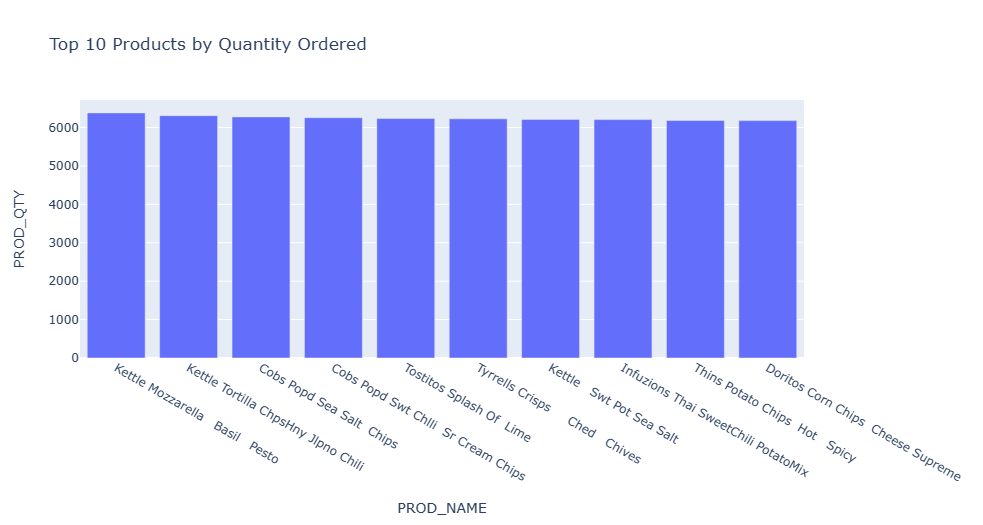

- **As observed from graph there is not much difference in quantity. Still ''Kettle Mozzarella Basil Pesto'' is product which customer purchased maximum times**.

### What are the Unique Chips package Weights & Sales

In [105]:
data.WEIGHT_IN_GRAM.unique()

array([175, 160, 170, 150, 300, 165, 380, 330, 110, 210, 180, 200, 134,
       270, 220, 125,  70, 135, 250,  90, 190], dtype=int64)

In [106]:
data.WEIGHT_IN_GRAM.value_counts()

175    66389
150    43131
134    25102
110    22387
170    19983
165    15297
300    15166
330    12540
380     6416
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: WEIGHT_IN_GRAM, dtype: int64

In [112]:
top_pkg=pd.pivot_table(data=data, index='WEIGHT_IN_GRAM', values='TOT_SALES',
                           aggfunc=sum).sort_values(by='TOT_SALES', ascending=False)
top_pkg

,TOT_SALES
WEIGHT_IN_GRAM,
175,485431.4
150,304288.5
134,177655.5
110,162765.4
170,146673.0
330,136794.3
300,113330.6
165,101360.6
380,75419.6


In [113]:
top=top_pkg.reset_index()
top["WEIGHT_IN_GRAM"]=top["WEIGHT_IN_GRAM"].astype(str)
figure=px.bar(data_frame=top,
                  x='WEIGHT_IN_GRAM', y='TOT_SALES',
                  title='Chips Package with Highest Sales')
figure.show()

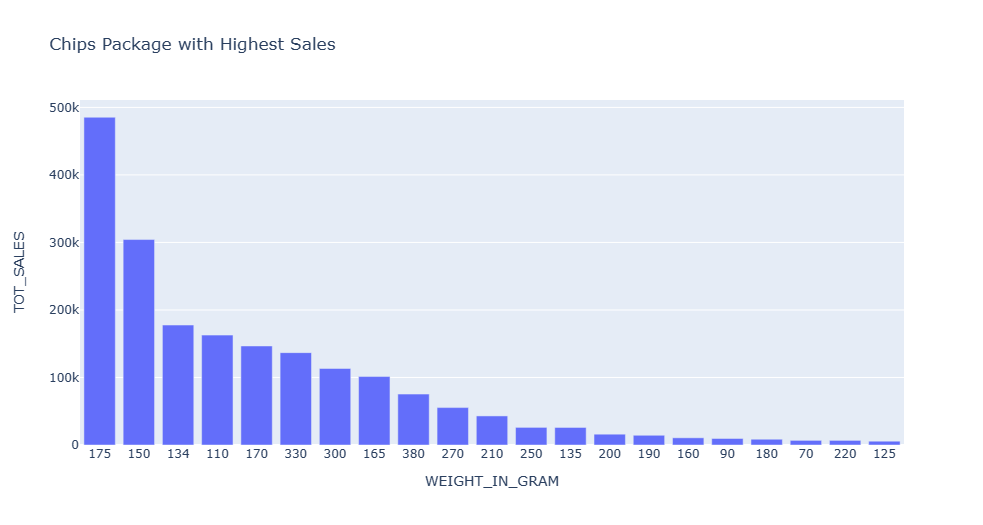

- **People are More Likely to buy a package of 175g weight.**
- **175g package of chips making more Sales.**

### Which Chips Brand most loved among customers & Sales by Brand

In [120]:
data['COMPANY/BRAND'].value_counts()

Kettle        41288
Smiths        31822
Doritos       28145
Pringles      25102
Woolworths    14757
Infuzions     14201
Thins         14075
RRD           11894
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Grainwaves     7740
Natural        7469
Tyrrells       6442
Red            5885
Cheezels       4603
CCS            4551
Sunbites       3008
Cheetos        2927
Burger         1564
French         1418
Name: COMPANY/BRAND, dtype: int64

In [117]:
top_brand=pd.pivot_table(data=data, index='COMPANY/BRAND', values='PROD_QTY',
                           aggfunc=sum).sort_values(by='PROD_QTY', ascending=False)
top_brand

,PROD_QTY
COMPANY/BRAND,
Kettle,79051
Smiths,60337
Doritos,53816
Pringles,48019
Woolworths,27856
Infuzions,27119
Thins,26929
RRD,22500
Cobs,18571


In [114]:
top_brand=pd.pivot_table(data=data, index='COMPANY/BRAND', values='TOT_SALES',
                           aggfunc=sum).sort_values(by='TOT_SALES', ascending=False)
top_brand

,TOT_SALES
COMPANY/BRAND,
Kettle,390239.8
Doritos,240590.9
Smiths,224654.2
Pringles,177655.5
Infuzions,99047.6
Old,90785.1
Thins,88852.5
Twisties,81522.1
Tostitos,79789.6


In [116]:
top=top_brand.reset_index()
figure=px.bar(data_frame=top,
                  x='COMPANY/BRAND', y='TOT_SALES',
                  title='Top Chips Brand with Highest Sales')
figure.show()

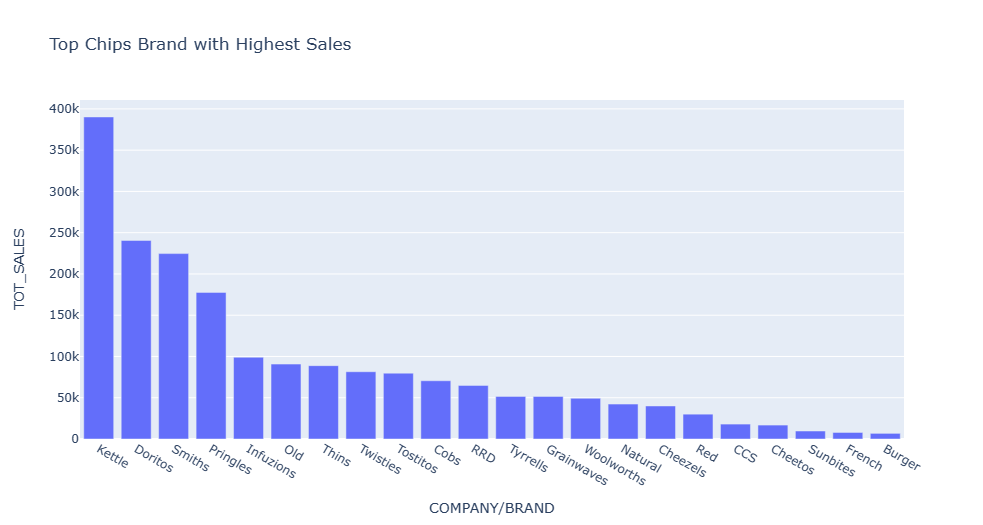

- **Kettle chips Brand Purchased maximum times & Sales of this Brand is also Maximum 39k.**
- **After Kettle, Smiths, Doritos & Pringles Brand Making more business.**

### Sales by Different LIfe Stage Customers

In [124]:
data['LIFESTAGE'].value_counts()

OLDER SINGLES/COUPLES     54478
RETIREES                  49763
OLDER FAMILIES            48594
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
Name: LIFESTAGE, dtype: int64

In [122]:
top_stg=pd.pivot_table(data=data, index='LIFESTAGE', values='TOT_SALES',
                           aggfunc=sum).sort_values(by='TOT_SALES', ascending=False)
top_stg

,TOT_SALES
LIFESTAGE,
OLDER SINGLES/COUPLES,402420.75
RETIREES,366470.90
OLDER FAMILIES,352467.20
YOUNG FAMILIES,316160.10
YOUNG SINGLES/COUPLES,260405.30
MIDAGE SINGLES/COUPLES,184751.30
NEW FAMILIES,50433.45


In [123]:
top=top_stg.reset_index()
figure=px.bar(data_frame=top,
                  x='LIFESTAGE', y='TOT_SALES',
                  title='Top LifeStag with Highest Sales')
figure.show()

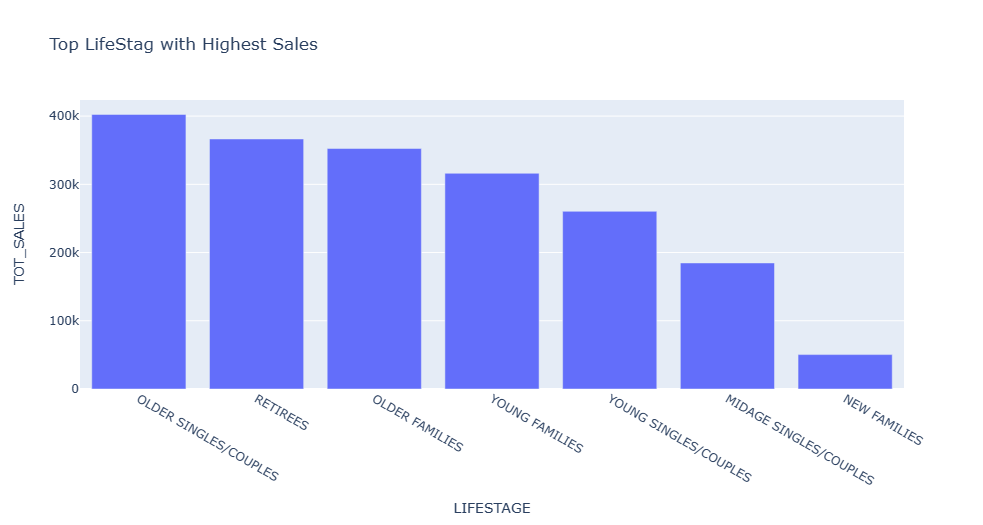

- **Older Single/Couple Family Buying more chips and giving maximum business of nearly 400K. Then Retired family and Older families**

###  Sales by Customer type

In [125]:
data['PREMIUM_CUSTOMER'].value_counts()

Mainstream    101988
Budget         93157
Premium        69688
Name: PREMIUM_CUSTOMER, dtype: int64

In [126]:
top_cat=pd.pivot_table(data=data, index='PREMIUM_CUSTOMER', values='TOT_SALES',
                           aggfunc=sum).sort_values(by='TOT_SALES', ascending=False)
top_cat

,TOT_SALES
PREMIUM_CUSTOMER,
Mainstream,750744.50
Budget,676211.55
Premium,506152.95


In [127]:
top=top_cat.reset_index()
figure=px.bar(data_frame=top,
                  x='PREMIUM_CUSTOMER', y='TOT_SALES',
                  title='Customer Type with Highest Sales')
figure.show()

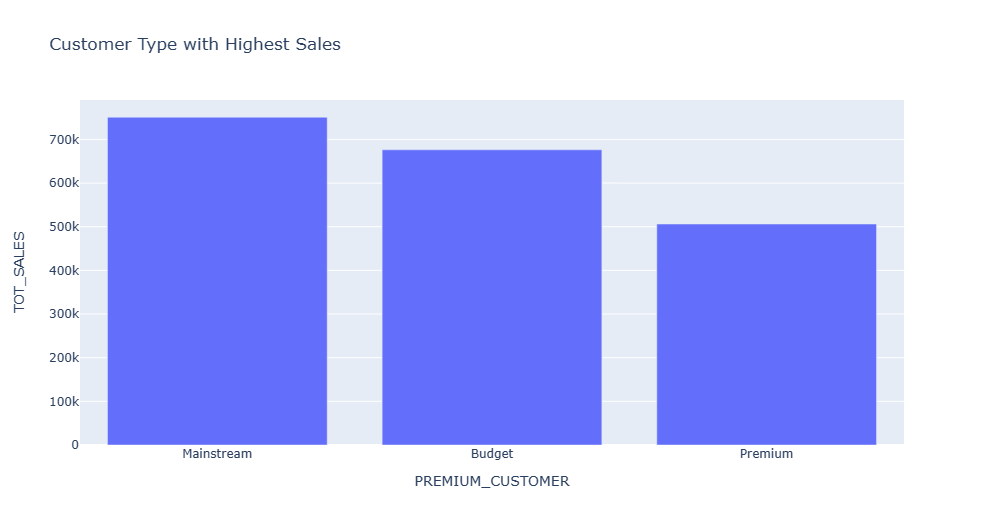

- **Mainstrean Customers buying more chips & giving maximum Sales of 750K.**

### Number of Unique Customers in Premium Customers Category with different LifeStages

In [144]:
cust=data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['LYLTY_CARD_NBR'].nunique().sort_values(ascending=False)
cust=pd.DataFrame(cust)
cust.rename({'LYLTY_CARD_NBR':'Number of Customers'},axis=1, inplace=True)
cust

Number of Customers
PREMIUM_CUSTOMER LIFESTAGE                                  
Mainstream       YOUNG SINGLES/COUPLES                  8088
                 RETIREES                               6479
                 OLDER SINGLES/COUPLES                  4930
Budget           OLDER SINGLES/COUPLES                  4929
Premium          OLDER SINGLES/COUPLES                  4750
Budget           OLDER FAMILIES                         4675
                 RETIREES                               4454
                 YOUNG FAMILIES                         4017
Premium          RETIREES                               3872
Budget           YOUNG SINGLES/COUPLES                  3779
Mainstream       MIDAGE SINGLES/COUPLES                 3340
                 OLDER FAMILIES                         2831
                 YOUNG FAMILIES                         2728
Premium          YOUNG SINGLES/COUPLES                  2574
                 YOUNG FAMILIES                         2433
                 MIDAGE SINGLES/COUPLES                 2431
                 OLDER FAMILIES                         2273
Budget           MIDAGE SINGLES/COUPLES                 1504
                 NEW FAMILIES                           1112
Mainstream       NEW FAMILIES                            849
Premium          NEW FAMILIES                            588

In [146]:
cust=cust.reset_index()
figure=px.bar(data_frame=cust,
              x='LIFESTAGE', y='Number of Customers',
              color='PREMIUM_CUSTOMER',
              title='Number of Customers by Premium Customers & Lifestage')
figure.show()

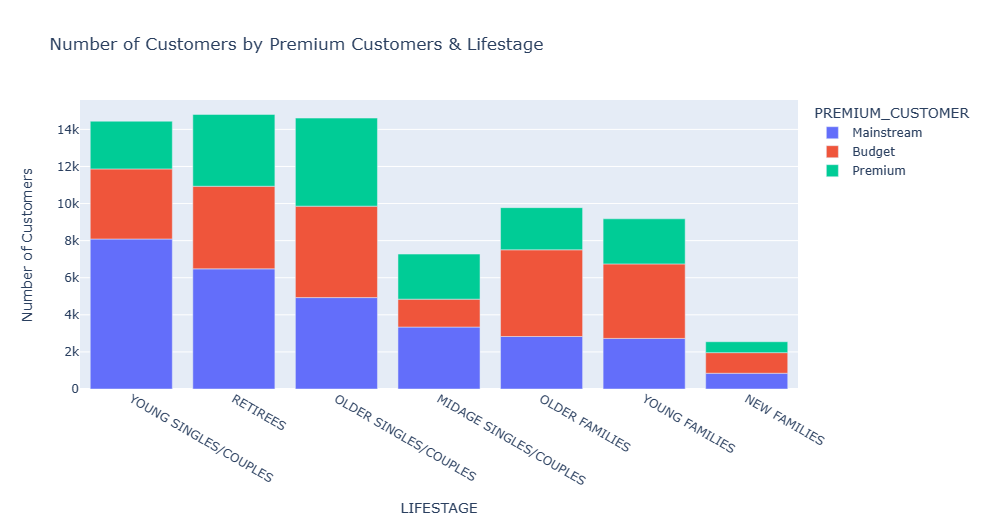

- **There are more Mainstream Young Singles/Couples, Retirees & Older Single/Couple** 

### Sales by Premium Customers & LifeStage

In [128]:
sales= pd.pivot_table(data=data, index=['PREMIUM_CUSTOMER','LIFESTAGE'],
                      values='TOT_SALES', aggfunc=sum).sort_values(by='TOT_SALES', ascending=False)
sales

TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                        
Budget           OLDER FAMILIES          168363.25
Mainstream       YOUNG SINGLES/COUPLES   157621.60
                 RETIREES                155677.05
Budget           YOUNG FAMILIES          139345.85
                 OLDER SINGLES/COUPLES   136769.80
Mainstream       OLDER SINGLES/COUPLES   133393.80
Premium          OLDER SINGLES/COUPLES   132257.15
Budget           RETIREES                113147.80
Mainstream       OLDER FAMILIES          103445.55
Premium          RETIREES                 97646.05
Mainstream       YOUNG FAMILIES           92788.75
                 MIDAGE SINGLES/COUPLES   90803.85
Premium          YOUNG FAMILIES           84025.50
                 OLDER FAMILIES           80658.40
Budget           YOUNG SINGLES/COUPLES    61141.60
Premium          MIDAGE SINGLES/COUPLES   58432.65
                 YOUNG SINGLES/COUPLES    41642.10
Budget           MIDAGE SINGLES/COUPLES   35514.80
                 NEW FAMILIES             21928.45
Mainstream       NEW FAMILIES             17013.90
Premium          NEW FAMILIES             11491.10

In [134]:
sale=sales.reset_index()
figure=px.bar(data_frame=sale,
              x='LIFESTAGE', y='TOT_SALES',
              color='PREMIUM_CUSTOMER',
              title=' Sales by Premium Customers & Lifestage')
figure.show()

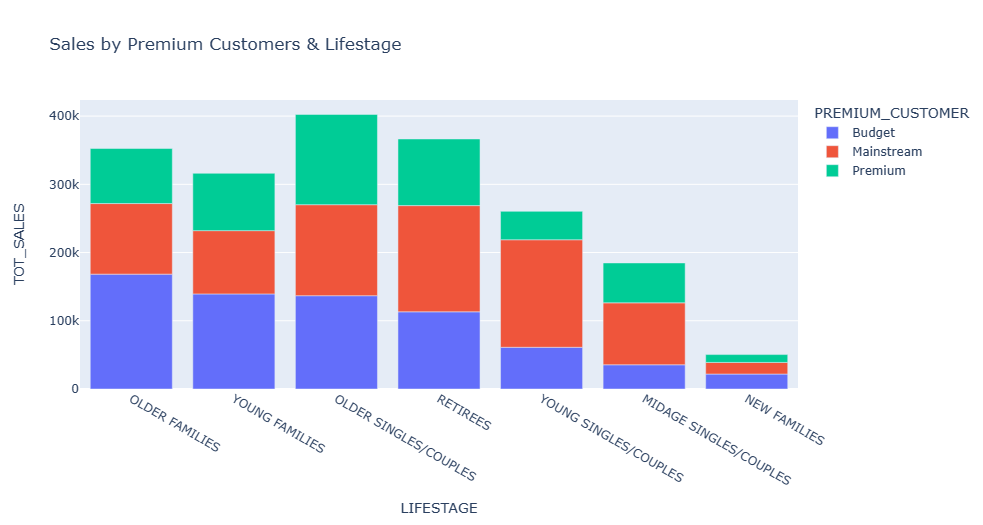

- **Top 3 maximum sales come from "Budget Older Families, Mainstream Young Singles/Couples and Mainstream Retires.**

### Conclusion:
-1.  **Sales went to minimun twise in a span of 365 days, in August 2018 and then in May 2019. Sales is High in December Month Due to Christmas & New year.**

-2.  **"Store Number- 226" sold most chips packages & done Highest Sales**

-3.  **"Kettle Mozzarella Basil Pesto" is the product which customer purchased maximum times.**

-4.  **"Dorito Corn Chp Supreme" is the Product with maximum business of 39k.**

-5.  **People are More Likely to buy a package of 175g weight. 175g package of chips making more Sales.**

-6.  **"Kettle chips Brand" Purchased maximum times & Sales of this Brand is also Maximum 39k.**

-7.  **"Older Single/Couple Family" Buying more chips and giving maximum business of nearly 400K. Then "Retired family" and "Older families"**

-8.  **"Mainstrean Customers" buying more chips & giving maximum Sales of 750K.**

-9.  **More Customers from "Mainstream Young Singles/Couples", "Retirees" & "Older Single/Couple".**

-10. **Top 3 Maximum sales come from "Budget Older Families", "Mainstream Young Singles/Couples" and "Mainstream Retires".**